Este projeto o trabalho de fim de curso do aluno Igor Peterossi Lopes (RA:174929) para o curso de engenharia elétrica da Unicamp, feito no 2 semestre de 2022.

Este trabalho pretende resolver um problema de classificação binária através de duas estratégias distintas: utilizando um classificador implementado com regressão logística e utilizando um classificador feito com uma rede neural e através dos resultados obtidos comparar os dois métodos de resolução do problema.

O problema que esta sendo analisado é o da classificação de websites em sites de phishing e sites seguros (que não são de phishing), os dados para essa classificação fazem parte do acervo de machine learning da University of California, School of Information and Computer Science, disponível no seguinte link: https://archive.ics.uci.edu/ml/datasets/phishing+websites


Como primeira etapa, obtemos os dados que serão estudados e depois passamos a fazer pequenas adaptações nestes a fim de viabilizar a sua utilização pelos modelos que serão desenvolvidos

In [112]:
from sklearn.datasets import fetch_openml

X_data, y_data = fetch_openml(data_id=4534, return_X_y=True)
X_data = X_data.astype("int64")
y_data = y_data.astype("int64")

def map_output(value):
    if value == -1:
        return 0
    return value

y_data = y_data.apply(map_output)

In [113]:
# y_data = y_data[:1000]
# X_data = X_data[:1000]
X_data= X_data.loc[:, 'port':'SFH']

Agora realizamos algumas observações em cima dos dados para que possamos compreender melhor as suas características

In [114]:
X_data

,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH
0,1,-1,1,-1,1,-1
1,1,-1,1,0,-1,-1
2,1,-1,1,0,-1,-1
3,1,-1,-1,0,0,-1
4,1,1,1,0,0,-1
...,...,...,...,...,...,...
11050,-1,1,1,1,1,-1
11051,-1,1,1,-1,-1,0
11052,1,1,1,0,-1,-1
11053,1,1,-1,-1,1,-1


In [115]:
y_data

0        0
1        0
2        0
3        0
4        1
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: Result, Length: 11055, dtype: int64

Primeiro, criamos o modelo de regressão logística. Usaremos a biblioteca scikit-learn para auxiliar no desenvolvimento do modelo, bem como na separação dos nossos dados em partes para treinamento e para validação posterior

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

With our model trained, we proceed to assess the quality of the model and how well it performs taking a look at several metrics, such as it's accuracy and confusion matrix

In [117]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1137  361]
 [  90 1729]]


In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1498
           1       0.83      0.95      0.88      1819

    accuracy                           0.86      3317
   macro avg       0.88      0.85      0.86      3317
weighted avg       0.87      0.86      0.86      3317



In [120]:
X_data.shape[1]

6

Now we proceed to train and evaluate the quality of our deep learning model
We'll be using the TensorFlow library to help us in this process. Here we implement a 2 layer neural network, with an inner layer with a node for each feature in our dataset and a Rectified Linear Units as the activation function and a second layer that consolidates the output into the range of 0 to 1 (probability) using a sigmoid function

In [121]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(X_data.shape[1],)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 30)                210       
                                                                 
 dense_25 (Dense)            (None, 1)                 31        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [122]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100, verbose=False)
deep_learning_loss, deep_learning_acc = model.evaluate(X_test,  y_test, verbose=2)
print('Accuracy of deep learning classifier on test set: {:.2f}'.format(deep_learning_acc))

104/104 - 0s - loss: 0.3068 - accuracy: 0.8655 - 55ms/epoch - 532us/step
Accuracy of deep learning classifier on test set: 0.87


[]

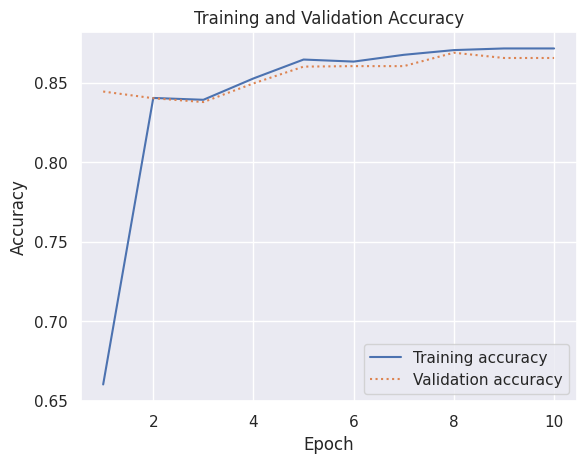

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()